In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

original_data = pd.read_csv("lungcancer.csv", sep=";")
age_generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
gender_generalized_data = pd.read_csv("lungcancer_gender_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")

features = original_data.drop(columns=["LUNG_CANCER"])
target = original_data["LUNG_CANCER"]

features_encoded = pd.get_dummies(features)

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

classifier_original = RandomForestClassifier(random_state=42)
classifier_original.fit(X_train, y_train)

y_pred_original = classifier_original.predict(X_test)

print("Original Dataset Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
print("Precision (YES):", precision_score(y_test, y_pred_original, pos_label="YES"))
print("Recall (YES):", recall_score(y_test, y_pred_original, pos_label="YES"))
print("F1 Score (YES):", f1_score(y_test, y_pred_original, pos_label="YES"))


Original Dataset Metrics:
Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Precision (YES): 0.9833333333333333
Recall (YES): 0.9833333333333333
F1 Score (YES): 0.9833333333333333


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_classification(dataset, dataset_name):
    features = dataset.drop(columns=["LUNG_CANCER"])
    target = dataset["LUNG_CANCER"]

    features_encoded = pd.get_dummies(features)

    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print(f"Classification Report for {dataset_name}:\n")
    report = classification_report(y_test, y_pred, target_names=["NO", "YES"], output_dict=True)
    print(pd.DataFrame(report).transpose())
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

original_data = pd.read_csv("lungcancer.csv", sep=";")
age_generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
gender_generalized_data = pd.read_csv("lungcancer_gender_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")

evaluate_classification(original_data, "Original Dataset")
evaluate_classification(age_generalized_data, "Age Generalized Dataset")
evaluate_classification(gender_generalized_data, "Gender Generalized Dataset")
evaluate_classification(perturbed_data, "Perturbed Dataset")
evaluate_classification(suppressed_data, "Suppressed Dataset")


Classification Report for Original Dataset:

              precision    recall  f1-score    support
NO             0.500000  0.500000  0.500000   2.000000
YES            0.983333  0.983333  0.983333  60.000000
accuracy       0.967742  0.967742  0.967742   0.967742
macro avg      0.741667  0.741667  0.741667  62.000000
weighted avg   0.967742  0.967742  0.967742  62.000000
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


Classification Report for Age Generalized Dataset:

              precision    recall  f1-score    support
NO             0.333333  0.500000  0.400000   2.000000
YES            0.983051  0.966667  0.974790  60.000000
accuracy       0.951613  0.951613  0.951613   0.951613
macro avg      0.658192  0.733333  0.687395  62.000000
weighted avg   0.962092  0.951613  0.956248  62.000000
Confusion Matrix:
 [[ 1  1]
 [ 2 58]]


Classification Report for Gender Generalized Dataset:

              precision    recall  f1-score    support
NO             0.500000  0.500000  0.500000   2.00000

Accuracy for Original: 0.967741935483871
Accuracy for Suppressed: 0.9838709677419355
Accuracy for Generalized: 0.9516129032258065
Accuracy for Perturbed: 0.967741935483871


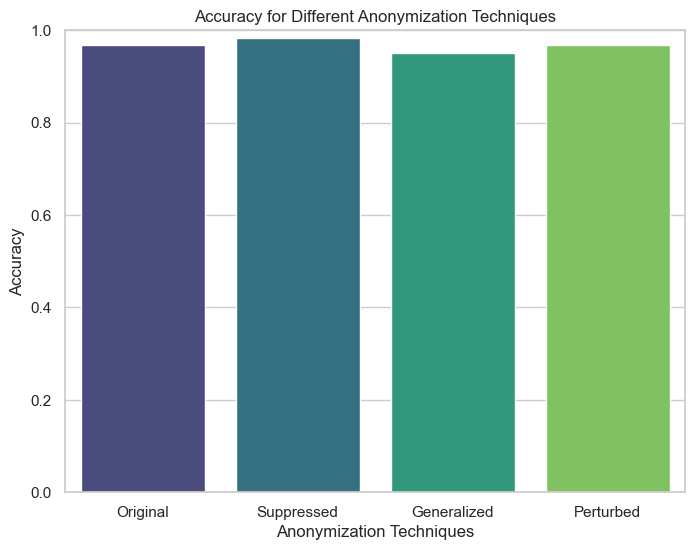

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_accuracy(dataset, dataset_name):
    features = dataset.drop(columns=["LUNG_CANCER"])
    target = dataset["LUNG_CANCER"]

    features_encoded = pd.get_dummies(features)

    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_name}: {accuracy}")

    return accuracy

original_data = pd.read_csv("lungcancer.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")
generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")

original_accuracy = evaluate_accuracy(original_data, "Original")
suppressed_accuracy = evaluate_accuracy(suppressed_data, "Suppressed")
generalized_accuracy = evaluate_accuracy(generalized_data, "Generalized")
perturbed_accuracy = evaluate_accuracy(perturbed_data, "Perturbed")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=["Original", "Suppressed", "Generalized", "Perturbed"],
            y=[original_accuracy, suppressed_accuracy, generalized_accuracy, perturbed_accuracy],
            palette="viridis")
plt.title('Accuracy for Different Anonymization Techniques')
plt.ylabel('Accuracy')
plt.xlabel('Anonymization Techniques')
plt.ylim(0, 1)
plt.show()



Precision for Original: 0.9833333333333333
Precision for Suppressed: 0.9836065573770492
Precision for Generalized: 0.9830508474576272
Precision for Perturbed: 0.9833333333333333


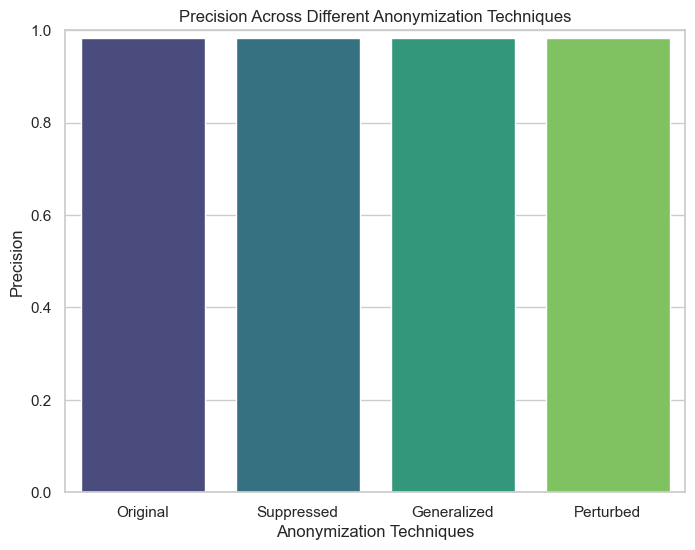

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_precision(dataset, dataset_name):
    features = dataset.drop(columns=["LUNG_CANCER"])
    target = dataset["LUNG_CANCER"]

    features_encoded = pd.get_dummies(features)

    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    precision = precision_score(y_test, y_pred, pos_label="YES")
    print(f"Precision for {dataset_name}: {precision}")

    return precision

original_data = pd.read_csv("lungcancer.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")
generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")

original_precision = evaluate_precision(original_data, "Original")
suppressed_precision = evaluate_precision(suppressed_data, "Suppressed")
generalized_precision = evaluate_precision(generalized_data, "Generalized")
perturbed_precision = evaluate_precision(perturbed_data, "Perturbed")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=["Original", "Suppressed", "Generalized", "Perturbed"],
            y=[original_precision, suppressed_precision, generalized_precision, perturbed_precision],
            palette="viridis", linewidth=1)
plt.title('Precision Across Different Anonymization Techniques')
plt.ylabel('Precision')
plt.xlabel('Anonymization Techniques')
plt.ylim(0, 1)
plt.show()


Recall for Original: 0.9833333333333333
Recall for Suppressed: 1.0
Recall for Generalized: 0.9666666666666667
Recall for Perturbed: 0.9833333333333333


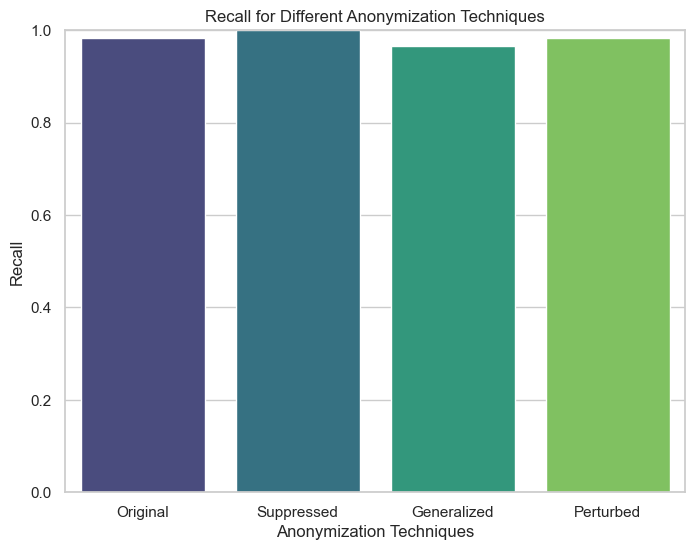

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_recall(dataset, dataset_name):
    features = dataset.drop(columns=["LUNG_CANCER"])
    target = dataset["LUNG_CANCER"]

    features_encoded = pd.get_dummies(features)

    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    recall = recall_score(y_test, y_pred, pos_label="YES")
    print(f"Recall for {dataset_name}: {recall}")

    return recall

original_data = pd.read_csv("lungcancer.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")
generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")

original_recall = evaluate_recall(original_data, "Original")
suppressed_recall = evaluate_recall(suppressed_data, "Suppressed")
generalized_recall = evaluate_recall(generalized_data, "Generalized")
perturbed_recall = evaluate_recall(perturbed_data, "Perturbed")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=["Original", "Suppressed", "Generalized", "Perturbed"],
            y=[original_recall, suppressed_recall, generalized_recall, perturbed_recall],
            palette="viridis", linewidth=1)
plt.title('Recall for Different Anonymization Techniques')
plt.ylabel('Recall')
plt.xlabel('Anonymization Techniques')
plt.ylim(0, 1)
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def calculate_utility(dataset, dataset_name):
    features = dataset.drop(columns=["LUNG_CANCER"])
    target = dataset["LUNG_CANCER"]

    features_encoded = pd.get_dummies(features)

    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print(f"Utility Metrics for {dataset_name}:\n")
    print(classification_report(y_test, y_pred, target_names=["NO", "YES"]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

age_generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
gender_generalized_data = pd.read_csv("lungcancer_gender_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")

calculate_utility(age_generalized_data, "Age Generalized Dataset")
calculate_utility(gender_generalized_data, "Gender Generalized Dataset")
calculate_utility(perturbed_data, "Perturbed Dataset")
calculate_utility(suppressed_data, "Suppressed Dataset")


Utility Metrics for Age Generalized Dataset:

              precision    recall  f1-score   support

          NO       0.33      0.50      0.40         2
         YES       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62

Confusion Matrix:
 [[ 1  1]
 [ 2 58]]


Utility Metrics for Gender Generalized Dataset:

              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


Utility Metrics for Perturbed Dataset:

              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.9

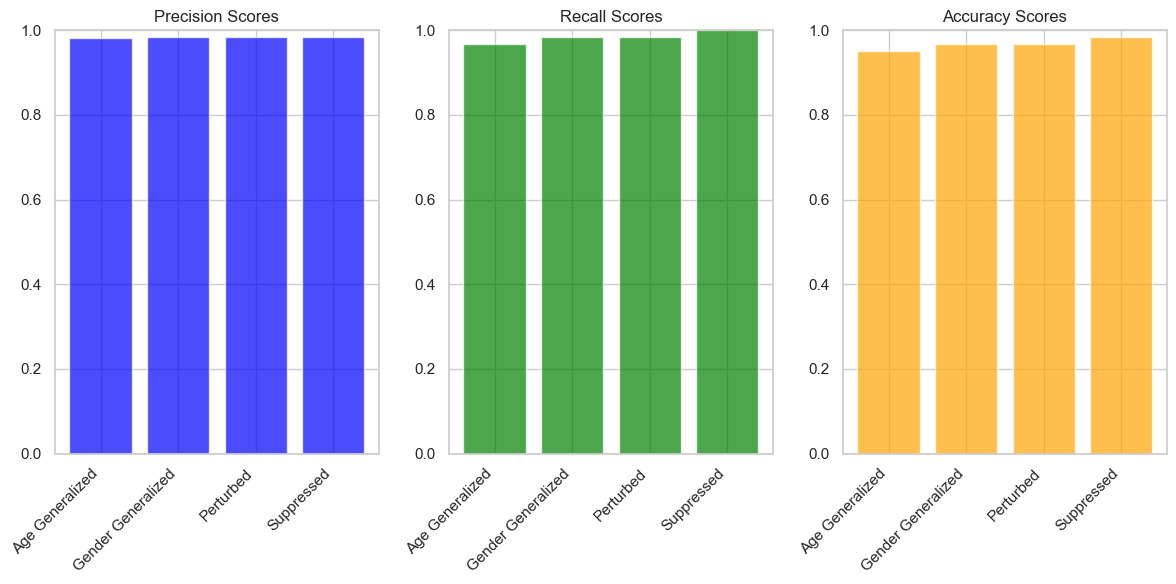

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

def calculate_utility_metrics(dataset):
    features = dataset.drop(columns=["LUNG_CANCER"])
    target = dataset["LUNG_CANCER"]

    features_encoded = pd.get_dummies(features)

    X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    precision = precision_score(y_test, y_pred, pos_label="YES")
    recall = recall_score(y_test, y_pred, pos_label="YES")
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, accuracy

age_generalized_data = pd.read_csv("lungcancer_age_generalized.csv", sep=";")
gender_generalized_data = pd.read_csv("lungcancer_gender_generalized.csv", sep=";")
perturbed_data = pd.read_csv("lungcancer_perturbed.csv", sep=";")
suppressed_data = pd.read_csv("lungcancer_supressed.csv", sep=";")

age_precision, age_recall, age_accuracy = calculate_utility_metrics(age_generalized_data)
gender_precision, gender_recall, gender_accuracy = calculate_utility_metrics(gender_generalized_data)
perturbed_precision, perturbed_recall, perturbed_accuracy = calculate_utility_metrics(perturbed_data)
suppressed_precision, suppressed_recall, suppressed_accuracy = calculate_utility_metrics(suppressed_data)

labels = ['Age Generalized', 'Gender Generalized', 'Perturbed', 'Suppressed']
precision_scores = [age_precision, gender_precision, perturbed_precision, suppressed_precision]
recall_scores = [age_recall, gender_recall, perturbed_recall, suppressed_recall]
accuracy_scores = [age_accuracy, gender_accuracy, perturbed_accuracy, suppressed_accuracy]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(labels, precision_scores, color='blue', alpha=0.7)
plt.title('Precision Scores')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
plt.bar(labels, recall_scores, color='green', alpha=0.7)
plt.title('Recall Scores')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
plt.bar(labels, accuracy_scores, color='orange', alpha=0.7)
plt.title('Accuracy Scores')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


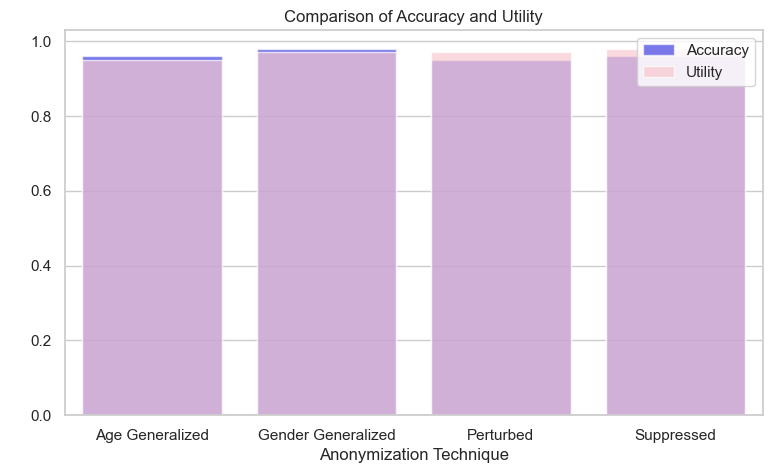

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

accuracy_scores = [0.96, 0.98, 0.95, 0.96]
utility_scores = [0.95, 0.97, 0.97, 0.98]

data = {
    'Anonymization Technique': ['Age Generalized', 'Gender Generalized', 'Perturbed', 'Suppressed'],
    'Accuracy': accuracy_scores,
    'Utility': utility_scores
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))

sns.barplot(x='Anonymization Technique', y='Accuracy', data=df, color='blue', alpha=0.6, label='Accuracy')
sns.barplot(x='Anonymization Technique', y='Utility', data=df, color='pink', alpha=0.7, label='Utility')

plt.title('Comparison of Accuracy and Utility')
plt.ylabel(' ')
plt.legend()

plt.show()
